In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
import warnings
warnings.simplefilter('ignore')

In [ ]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

### Read the dataset for churn 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ds = pd.read_csv("/content/drive/MyDrive/НУЛП АСУ /смарт-системи/Інформаційні технології Смарт систем/практичні  роботи/example/data/train.csv")

## Data engineering 

#### Missing data imputation

In [ ]:
mean_impute_columns = ['MonthlyRevenue',
 'MonthlyMinutes',
 'TotalRecurringCharge',
 'DirectorAssistedCalls',
 'OverageMinutes',
 'RoamingCalls',
 'PercChangeMinutes',
 'PercChangeRevenues']
mode_impute_columns = [
 'ServiceArea',
 'Handsets',
 'HandsetModels',
 'CurrentEquipmentDays',
 'AgeHH1',
 'AgeHH2']

In [ ]:
def impute_na(df, variable, value):

    return df[variable].fillna(value)

In [ ]:
# Let's create a dict of mean values

mean_impute_values = dict()
for column in mean_impute_columns:
    mean_impute_values[column] = ds[column].mean()
print(mean_impute_values)

{'MonthlyRevenue': 58.834492346387385, 'MonthlyMinutes': 525.6534161246586, 'TotalRecurringCharge': 46.830087834784145, 'DirectorAssistedCalls': 0.895229018883496, 'OverageMinutes': 40.02778487355328, 'RoamingCalls': 1.2362441296103437, 'PercChangeMinutes': -11.547908445146014, 'PercChangeRevenues': -1.19198500394633}


In [ ]:
for column in mean_impute_columns:
    ds[column] = impute_na(ds, column, mean_impute_values[column])

In [ ]:
# Let's create a dict of mode values

mode_impute_values = dict()
for column in mode_impute_columns:
    mode_impute_values[column] = ds[column].mode()[0]
print(mode_impute_values)

{'ServiceArea': 'NYCBRO917', 'Handsets': 1.0, 'HandsetModels': 1.0, 'CurrentEquipmentDays': 202.0, 'AgeHH1': 0.0, 'AgeHH2': 0.0}


In [ ]:
for column in mode_impute_columns:
    ds[column] = impute_na(ds, column, mode_impute_values[column])

##### Outlier Engineering

In [ ]:
outlier_columns = ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 
                   'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 
                   'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 
                   'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 
                   'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 
                   'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 
                   'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 
                   'MonthsInService', 'UniqueSubs', 'ActiveSubs']


In [ ]:
ds = ds[(np.abs(stats.zscore(ds[outlier_columns])) < 4).all(axis=1)]

##### Categorical encoding

In [ ]:
cat_columns = ['Churn',
 'ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'Homeownership',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'OwnsMotorcycle',
 'MadeCallToRetentionTeam',
 'MaritalStatus',
 'ServiceArea', 'HandsetPrice','CreditRating', 'PrizmCode', 'Occupation',]

In [ ]:
map_dicts = dict()
for column in cat_columns:
    ds[column] = ds[column].astype('category')
    map_dicts[column] = dict(zip(ds[column], ds[column].cat.codes))
    ds[column] = ds[column].cat.codes
    

In [ ]:
display(ds.sample(15))

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
4059,3031782,1,30.26,54.0,30.0,0.00,0.0,0.0,-18.000000,-0.300000,0.7,0.0,5.3,0.0,0.3,1.1,4.0,0.3,6.0,11.3,0.7,0.0,0.0,30,1,1,471,2.0,2.0,533.0,32.0,0.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,5,0,0,8,0,3,0,3,0
12106,3095422,1,53.59,87.0,50.0,0.00,0.0,0.3,-39.000000,-0.300000,0.0,1.7,1.3,1.0,0.0,14.7,1.0,0.0,21.0,4.0,1.7,0.0,0.0,23,1,1,563,1.0,1.0,690.0,52.0,40.0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,6,0,0,15,0,2,2,0,1
39745,3316826,0,48.25,376.0,45.0,0.25,26.0,0.0,138.000000,24.300000,4.7,22.0,4.3,1.3,0.7,70.1,9.3,2.0,79.7,41.0,26.7,0.0,0.3,11,1,1,368,1.0,1.0,320.0,28.0,0.0,0,0,1,0,0,0,1,1,0,1,1,1,0,0,0,0,0,3,0,0,15,0,1,3,4,0
35187,3280906,1,45.02,732.0,36.0,0.00,1.0,0.0,39.000000,-9.000000,0.7,5.3,38.0,0.0,0.0,221.3,60.7,16.7,102.7,127.3,6.7,1.3,4.3,10,3,2,626,2.0,2.0,118.0,40.0,0.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,8,0,0,0,0,0,3,3,1
10322,3081374,0,41.43,49.0,30.0,1.24,0.0,0.0,-49.000000,-11.400000,1.3,0.0,2.0,0.0,0.0,0.3,4.3,0.3,6.3,3.0,1.3,0.0,0.0,22,3,3,471,2.0,2.0,121.0,44.0,44.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7,0,0,8,0,2,0,3,1
25177,3198726,0,40.24,276.0,50.0,0.25,0.0,0.0,-4.000000,-0.200000,3.0,0.0,4.3,0.0,0.0,14.0,15.0,1.3,72.0,7.3,3.0,0.0,0.3,15,1,1,214,1.0,1.0,456.0,30.0,28.0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,7,0,0,15,0,1,3,3,2
39658,3316086,0,10.00,95.0,10.0,0.00,0.0,0.0,-72.000000,0.000000,1.7,1.7,2.0,0.0,0.0,0.0,1.0,0.0,14.7,1.3,3.3,0.0,0.0,11,2,2,451,1.0,1.0,320.0,62.0,60.0,0,0,1,1,1,0,1,1,0,1,1,1,0,0,1,0,0,9,0,0,15,0,1,3,4,2
42513,3338010,0,82.49,633.0,90.0,0.00,0.0,0.0,13.000000,2.500000,7.7,2.3,19.3,0.0,0.7,260.4,35.3,29.0,222.3,46.0,10.0,0.0,3.0,9,2,2,280,3.0,3.0,80.0,56.0,54.0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,9,0,0,5,0,1,2,3,2
1670,3013066,0,50.69,138.0,50.0,0.25,0.0,0.0,-38.000000,-0.700000,1.3,0.7,10.0,0.0,0.0,12.2,5.0,0.7,25.3,15.3,2.0,0.0,0.0,36,1,1,93,2.0,2.0,665.0,32.0,0.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,9,0,0,8,0,2,0,3,1
40885,3325814,0,32.49,219.0,42.0,0.00,0.0,0.0,14.000000,-2.500000,0.0,2.0,5.7,3.0,0.0,28.3,2.3,5.0,21.3,19.0,2.0,0.0,0.0,9,2,2,617,1.0,1.0,267.0,42.0,0.0,1,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,7,0,0,15,0,1,2,4,2


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46693 entries, 4 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 46693 non-null  int64  
 1   Churn                      46693 non-null  int8   
 2   MonthlyRevenue             46693 non-null  float64
 3   MonthlyMinutes             46693 non-null  float64
 4   TotalRecurringCharge       46693 non-null  float64
 5   DirectorAssistedCalls      46693 non-null  float64
 6   OverageMinutes             46693 non-null  float64
 7   RoamingCalls               46693 non-null  float64
 8   PercChangeMinutes          46693 non-null  float64
 9   PercChangeRevenues         46693 non-null  float64
 10  DroppedCalls               46693 non-null  float64
 11  BlockedCalls               46693 non-null  float64
 12  UnansweredCalls            46693 non-null  float64
 13  CustomerCareCalls          46693 non-null  flo

# Modelling

## Classification

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split

from sklearn import metrics

#### Define target and features columns

In [ ]:
y_column = ['Churn'] # target variable
X_columns = ['MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGroup',
       'OwnsMotorcycle', 'AdjustmentsToCreditRating', 'HandsetPrice',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatus']
X = ds[X_columns]
y = ds[y_column]

#### Train test set split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Let's train logistic regression with default parameters

reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)
y_pred = reg_log.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.99      0.83      9927
           1       0.41      0.01      0.02      4081

    accuracy                           0.71     14008
   macro avg       0.56      0.50      0.42     14008
weighted avg       0.62      0.71      0.59     14008



In [ ]:
# Let's train SVC with default parameters

svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred = svc_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83      9927
           1       0.00      0.00      0.00      4081

    accuracy                           0.71     14008
   macro avg       0.35      0.50      0.41     14008
weighted avg       0.50      0.71      0.59     14008



In [ ]:
# Let's train GaussianNB with default parameters

gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)
y_pred = gnb_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79      9927
           1       0.39      0.22      0.28      4081

    accuracy                           0.67     14008
   macro avg       0.56      0.54      0.53     14008
weighted avg       0.63      0.67      0.64     14008



In [ ]:
# Let's train SGDClassifier with default parameters

sgd_classifier = SGDClassifier()
sgd_classifier.fit(X_train, y_train)
y_pred = sgd_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72      9927
           1       0.35      0.39      0.37      4081

    accuracy                           0.61     14008
   macro avg       0.54      0.55      0.54     14008
weighted avg       0.62      0.61      0.62     14008



In [ ]:
# Let's train KNeighborsClassifier with default parameters

kn_classifier = KNeighborsClassifier()
kn_classifier.fit(X_train, y_train)
y_pred = kn_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.86      0.79      9927
           1       0.37      0.20      0.26      4081

    accuracy                           0.67     14008
   macro avg       0.55      0.53      0.52     14008
weighted avg       0.62      0.67      0.63     14008



In [ ]:
# Let's train DecisionTreeClassifier with default parameters

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      9927
           1       0.36      0.37      0.36      4081

    accuracy                           0.62     14008
   macro avg       0.55      0.55      0.55     14008
weighted avg       0.63      0.62      0.62     14008



In [ ]:
# Let's train RandomForestClassifier with default parameters

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.98      0.83      9927
           1       0.62      0.08      0.15      4081

    accuracy                           0.72     14008
   macro avg       0.67      0.53      0.49     14008
weighted avg       0.69      0.72      0.63     14008



In [ ]:
# Let's train RandomForestClassifier with non-default parameters

rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', max_depth = 20)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.93      0.82      9927
           1       0.49      0.16      0.24      4081

    accuracy                           0.71     14008
   macro avg       0.61      0.55      0.53     14008
weighted avg       0.66      0.71      0.65     14008



In [ ]:
# Let's train GradientBoostingClassifier with default parameters

gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)
y_pred = gb_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.98      0.83      9927
           1       0.61      0.07      0.13      4081

    accuracy                           0.72     14008
   macro avg       0.66      0.53      0.48     14008
weighted avg       0.69      0.72      0.63     14008



### Feature importances

In [ ]:
# we can use Random forest classifier 
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_columns[indices[f]], importances[indices[f]]))


Feature ranking:
1. CurrentEquipmentDays (0.067517)
2. PercChangeMinutes (0.049758)
3. MonthlyMinutes (0.048902)
4. MonthlyRevenue (0.045854)
5. MonthsInService (0.044657)
6. PercChangeRevenues (0.044196)
7. ServiceArea (0.042609)
8. PeakCallsInOut (0.037569)
9. UnansweredCalls (0.035940)
10. OffPeakCallsInOut (0.035886)
11. OutboundCalls (0.034498)
12. ReceivedCalls (0.033222)
13. TotalRecurringCharge (0.030543)
14. DroppedBlockedCalls (0.029458)
15. DroppedCalls (0.028261)
16. AgeHH1 (0.026354)
17. OverageMinutes (0.025911)
18. InboundCalls (0.025486)
19. BlockedCalls (0.023458)
20. AgeHH2 (0.020651)
21. RoamingCalls (0.020503)
22. DirectorAssistedCalls (0.019424)
23. IncomeGroup (0.017961)
24. CreditRating (0.017806)
25. CustomerCareCalls (0.017626)
26. CallWaitingCalls (0.016771)
27. UniqueSubs (0.012623)
28. HandsetPrice (0.012213)
29. PrizmCode (0.011762)
30. Handsets (0.011190)
31. Occupation (0.009511)
32. ThreewayCalls (0.009457)
33. MaritalStatus (0.008131)
34. ActiveSubs (0.

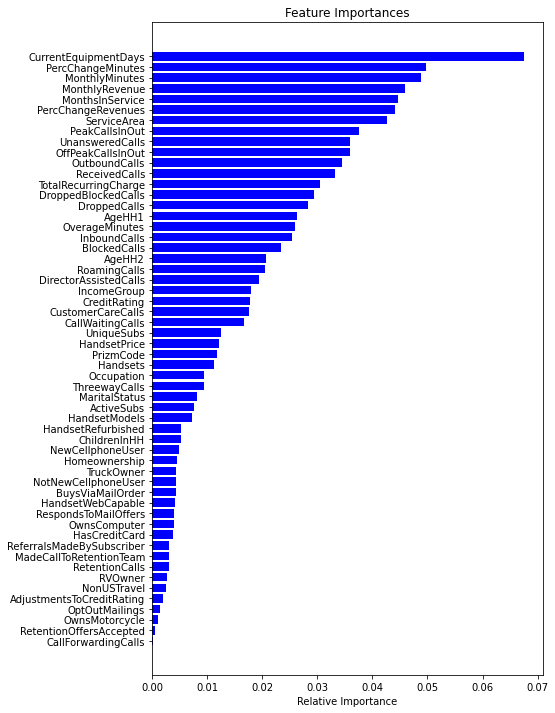

In [ ]:
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(7, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(gnb_classifier, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. MadeCallToRetentionTeam (0.012093)
2. RetentionCalls (0.012093)
3. RetentionOffersAccepted (0.006611)
4. HandsetWebCapable (0.004783)
5. OverageMinutes (0.003541)
6. PercChangeMinutes (0.002399)
7. HandsetRefurbished (0.001742)
8. AdjustmentsToCreditRating (0.001028)
9. CurrentEquipmentDays (0.000985)
10. UniqueSubs (0.000842)
11. ReferralsMadeBySubscriber (0.000585)
12. AgeHH2 (0.000571)
13. PercChangeRevenues (0.000428)
14. RVOwner (0.000414)
15. BuysViaMailOrder (0.000400)
16. RespondsToMailOffers (0.000385)
17. OwnsMotorcycle (0.000328)
18. ActiveSubs (0.000314)
19. MonthlyRevenue (0.000300)
20. HasCreditCard (0.000286)
21. PeakCallsInOut (0.000271)
22. RoamingCalls (0.000257)
23. CreditRating (0.000228)
24. IncomeGroup (0.000171)
25. MonthsInService (0.000171)
26. Homeownership (0.000157)
27. TruckOwner (0.000128)
28. BlockedCalls (0.000128)
29. InboundCalls (0.000114)
30. DroppedBlockedCalls (0.000100)
31. PrizmCode (0.000000)
32. ChildrenInHH (-0.000043)
33. 

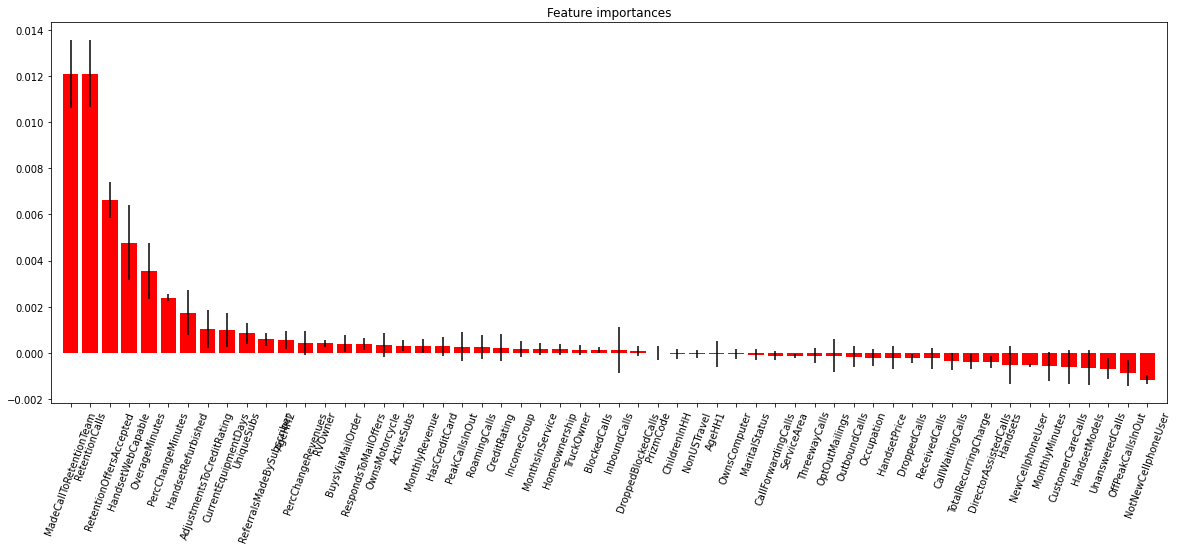

In [ ]:
plt.figure(figsize=(20, 7))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X_columns[indices[f]] for f in range(X_train.shape[1])])
plt.xticks(rotation=70)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split

from sklearn import metrics

In [ ]:
# Let's predict  RoamingCalls 

y_column = 'RoamingCalls'

X_columns = ['MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'Churn', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGroup',
       'OwnsMotorcycle', 'AdjustmentsToCreditRating', 'HandsetPrice',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatus']
X = ds[X_columns]
y = ds[y_column]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
models = {
    'LinearRegression' : LinearRegression(),
'LGBMRegressor' :LGBMRegressor(), 
'SGDRegressor' :SGDRegressor(), 
'RandomForestRegressor' :RandomForestRegressor(), 
'ElasticNet' :ElasticNet(), 
'BayesianRidge' :BayesianRidge(), 
'GradientBoostingRegressor' :GradientBoostingRegressor(), 
'SVR' :SVR(), 
}

In [ ]:
regressors = dict()
for name, model in models.items():
    print('training ',name)
    regressor = model
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print(metrics.mean_absolute_error(y_test, y_pred))
    print(metrics.mean_absolute_percentage_error(y_test, y_pred))
    regressors[name] = regressor


training  LinearRegression
1.2158001269126795
2486217884163284.5
training  LGBMRegressor
1.0457225944774662
1958531927692291.0
training  SGDRegressor
100580581701836.42
3.246409297269325e+29
training  RandomForestRegressor
1.1520426774237738
2358680396651235.0
training  ElasticNet
1.1802466615836247
2340094733438965.0
training  BayesianRidge
1.2073812778711874
2454344430089608.5
training  GradientBoostingRegressor
1.1209151566641187
2176624354410759.5
training  SVR
0.8380548739612491
319317092870542.56


### Feature importances

In [ ]:
# we can use Random forest classifier 
importances = regressors['RandomForestRegressor'].feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_columns[indices[f]], importances[indices[f]]))


Feature ranking:
1. MonthlyRevenue (0.138583)
2. OverageMinutes (0.066808)
3. TotalRecurringCharge (0.065883)
4. PercChangeRevenues (0.065229)
5. CurrentEquipmentDays (0.050665)
6. ServiceArea (0.050387)
7. PercChangeMinutes (0.036135)
8. MonthlyMinutes (0.030336)
9. PeakCallsInOut (0.029120)
10. MonthsInService (0.028957)
11. OffPeakCallsInOut (0.028784)
12. DroppedCalls (0.026668)
13. InboundCalls (0.025955)
14. OutboundCalls (0.025936)
15. UnansweredCalls (0.025381)
16. DroppedBlockedCalls (0.024769)
17. ReceivedCalls (0.024609)
18. DirectorAssistedCalls (0.021593)
19. BlockedCalls (0.021504)
20. CustomerCareCalls (0.018903)
21. AgeHH1 (0.017237)
22. AgeHH2 (0.016292)
23. CreditRating (0.014867)
24. IncomeGroup (0.013544)
25. CallWaitingCalls (0.012902)
26. ThreewayCalls (0.011787)
27. PrizmCode (0.010466)
28. HandsetPrice (0.010456)
29. Occupation (0.010120)
30. ActiveSubs (0.007753)
31. Handsets (0.006956)
32. UniqueSubs (0.006705)
33. MaritalStatus (0.005348)
34. Churn (0.004447)

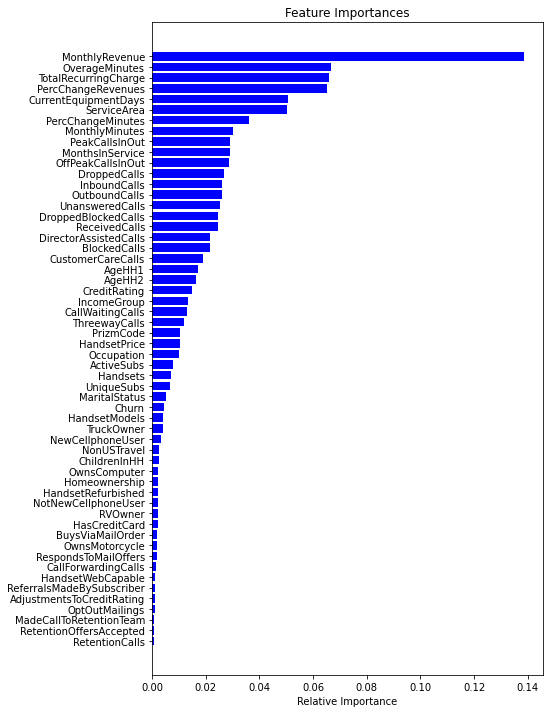

In [ ]:
importances = regressors['RandomForestRegressor'].feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(7, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(regressors['ElasticNet'], X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. MonthlyRevenue (1.363233)
2. OverageMinutes (0.406743)
3. TotalRecurringCharge (0.327174)
4. MonthlyMinutes (0.016598)
5. OffPeakCallsInOut (0.006953)
6. MonthsInService (0.003768)
7. ReceivedCalls (0.002612)
8. PercChangeMinutes (0.000752)
9. DroppedBlockedCalls (0.000734)
10. InboundCalls (0.000352)
11. AgeHH2 (0.000079)
12. UnansweredCalls (0.000000)
13. CustomerCareCalls (0.000000)
14. Occupation (0.000000)
15. BlockedCalls (0.000000)
16. OutboundCalls (0.000000)
17. DroppedCalls (0.000000)
18. PercChangeRevenues (0.000000)
19. Churn (0.000000)
20. CallForwardingCalls (0.000000)
21. CallWaitingCalls (0.000000)
22. DirectorAssistedCalls (0.000000)
23. UniqueSubs (0.000000)
24. ActiveSubs (0.000000)
25. Handsets (0.000000)
26. HandsetModels (0.000000)
27. ThreewayCalls (0.000000)
28. MaritalStatus (0.000000)
29. AgeHH1 (0.000000)
30. ChildrenInHH (0.000000)
31. PrizmCode (0.000000)
32. CreditRating (0.000000)
33. MadeCallToRetentionTeam (0.000000)
34. HandsetPrice

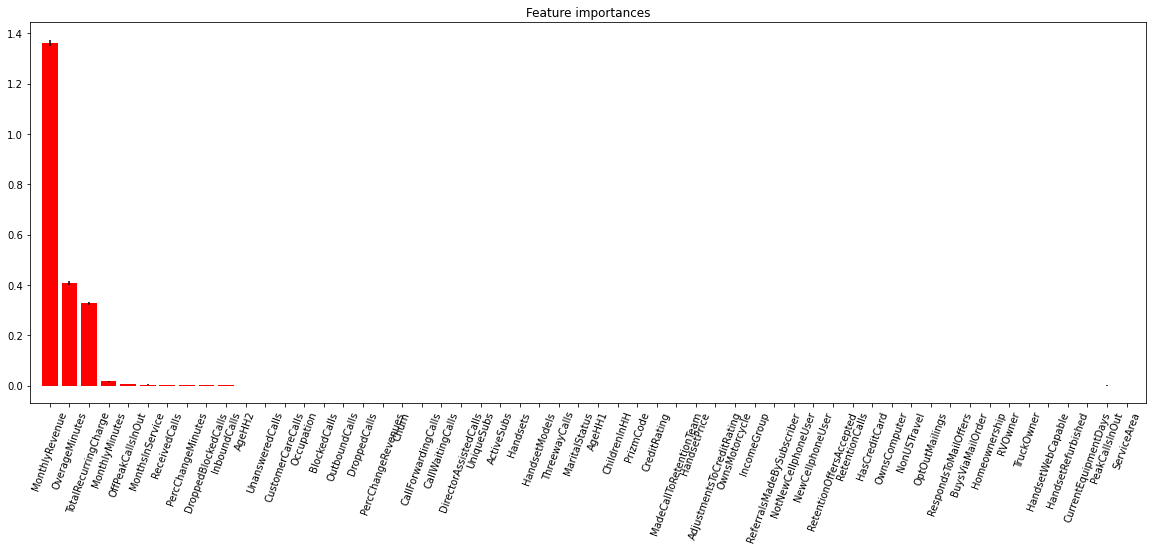

In [ ]:
plt.figure(figsize=(20, 7))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X_columns[indices[f]] for f in range(X_train.shape[1])])
plt.xticks(rotation=70)
plt.xlim([-1, X_train.shape[1]])
plt.show()